## 简单竞争网络

### 一次训练结果

经过一次训练后的权向量调整结果：
权向量 W_1: 笛卡尔坐标 = (0.6210, 0.7528), 角度 = 50.48°, 大小 = 0.9758
权向量 W_2: 笛卡尔坐标 = (-0.9565, 0.2448), 角度 = 165.64°, 大小 = 0.9874
权向量 W_3: 笛卡尔坐标 = (-0.3501, -0.8966), 角度 = -111.33°, 大小 = 0.9625


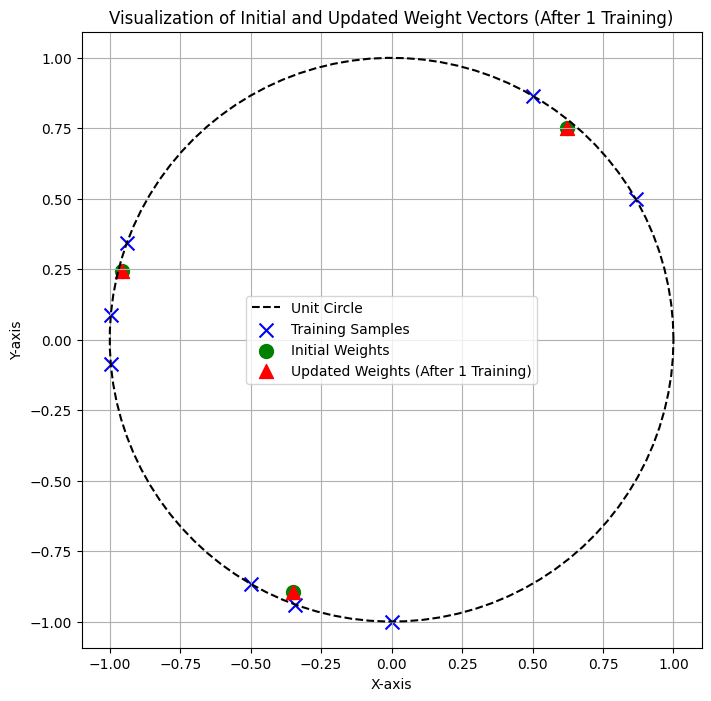

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 初始参数设置
learning_rate = 0.6  # 初始学习率
angles_w = [45, 155, 300]  # 初始权向量角度（度）
angles_x = [185, 175, 160, 270, 250, 240, 30, 60]  # 训练样本角度（度）

# 将角度转换为笛卡尔坐标
def polar_to_cartesian(magnitude, angle_deg):
    angle_rad = np.radians(angle_deg)
    x = magnitude * np.cos(angle_rad)
    y = magnitude * np.sin(angle_rad)
    return np.array([x, y])

# 初始权向量和训练样本
weights = [polar_to_cartesian(1, angle) for angle in angles_w]
samples = [polar_to_cartesian(1, angle) for angle in angles_x]

# 使用 WTA 算法进行一次训练
def wta_one_training(weights, samples, eta):
    updated_weights = weights.copy()
    for sample in samples:
        # 计算到每个权向量的距离
        distances = [np.linalg.norm(sample - w) for w in updated_weights]
        # 找到胜者（距离最近的权向量）
        winner_idx = np.argmin(distances)
        # 调整胜者的权向量朝向样本
        updated_weights[winner_idx] += eta * (sample - updated_weights[winner_idx])
    return updated_weights

# 进行一次训练并获取调整后的权向量
updated_weights_once = wta_one_training(weights, samples, learning_rate)

# 输出经过一次训练后的权向量
print("经过一次训练后的权向量调整结果：")
for i, w in enumerate(updated_weights_once, 1):
    angle = np.degrees(np.arctan2(w[1], w[0]))
    magnitude = np.linalg.norm(w)
    print(f"权向量 W_{i}: 笛卡尔坐标 = ({w[0]:.4f}, {w[1]:.4f}), 角度 = {angle:.2f}°, 大小 = {magnitude:.4f}")

# 可视化初始和更新后的权向量及样本点
plt.figure(figsize=(8, 8))

# 绘制单位圆
theta = np.linspace(0, 2 * np.pi, 100)
x_circle = np.cos(theta)
y_circle = np.sin(theta)
plt.plot(x_circle, y_circle, 'k--', label='Unit Circle')

# 绘制训练样本
sample_x = [s[0] for s in samples]
sample_y = [s[1] for s in samples]
plt.scatter(sample_x, sample_y, color='blue', label='Training Samples', s=100, marker='x')

# 绘制初始权向量
initial_x = [w[0] for w in weights]
initial_y = [w[1] for w in weights]
plt.scatter(initial_x, initial_y, color='green', label='Initial Weights', s=100, marker='o')

# 绘制一次训练后的权向量
updated_x = [w[0] for w in updated_weights_once]
updated_y = [w[1] for w in updated_weights_once]
plt.scatter(updated_x, updated_y, color='red', label='Updated Weights (After 1 Training)', s=100, marker='^')

# 设置图例和图形细节
plt.legend()
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Visualization of Initial and Updated Weight Vectors (After 1 Training)")
plt.grid(True)
plt.axis('equal')
plt.show()


### 两种rate在100次训练下的结果对比

第一种情况（等比例下降）的学习率变化：
[0.6, 0.44999999999999996, 0.33749999999999997, 0.253125, 0.18984375, 0.14238281249999998, 0.106787109375, 0.08009033203125, 0.0600677490234375, 0.04505081176757812, 0.033788108825683595, 0.025341081619262695, 0.01900581121444702, 0.014254358410835265, 0.01069076880812645, 0.008018076606094836, 0.006013557454571127, 0.004510168090928346, 0.0033826260681962595, 0.0025369695511471943, 0.0019027271633603958, 0.001427045372520297, 0.0010702840293902226, 0.000802713022042667, 0.0006020347665320003, 0.0004515260748990002, 0.00033864455617425013, 0.00025398341713068763, 0.0001904875628480157, 0.00014286567213601177, 0.00010714925410200883, 8.036194057650663e-05, 6.0271455432379966e-05, 4.5203591574284975e-05, 3.390269368071373e-05, 2.5427020260535297e-05, 1.9070265195401475e-05, 1.4302698896551106e-05, 1.072702417241333e-05, 8.045268129309998e-06, 6.033951096982498e-06, 4.525463322736874e-06, 3.3940974920526554e-06, 2.545573119039491e-06, 1.9091798392796184e-06, 1.43188487

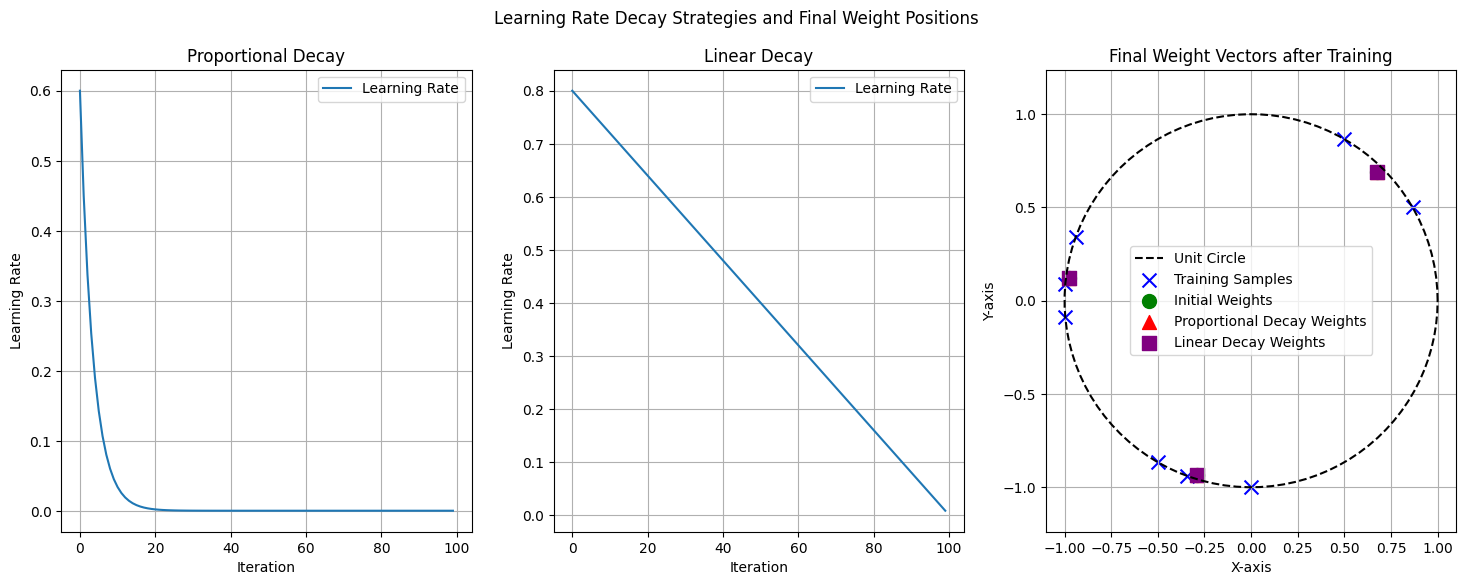

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 初始参数
initial_eta = 0.6
total_iterations = 100

def wta_training(weights, samples, eta_strategy):
    trained_weights = weights.copy()
    for eta in eta_strategy:
        for sample in samples:
            distances = [np.linalg.norm(sample - w) for w in trained_weights]
            winner_idx = np.argmin(distances)
            trained_weights[winner_idx] += eta * (sample - trained_weights[winner_idx])
    return trained_weights

# 第一种情况：等比例下降
eta_proportional = [initial_eta * (0.75 ** i) for i in range(total_iterations)]
final_weights_proportional = wta_training(weights, samples, eta_proportional)

# 第二种情况：线性下降
eta_linear = [(total_iterations - i) / total_iterations * 0.8 for i in range(total_iterations)]
final_weights_linear = wta_training(weights, samples, eta_linear)

# 将每种情况下的权向量转换为极坐标
final_weights_proportional_angles = [np.degrees(np.arctan2(w[1], w[0])) for w in final_weights_proportional]
final_weights_proportional_magnitudes = [np.linalg.norm(w) for w in final_weights_proportional]

final_weights_linear_angles = [np.degrees(np.arctan2(w[1], w[0])) for w in final_weights_linear]
final_weights_linear_magnitudes = [np.linalg.norm(w) for w in final_weights_linear]

# 输出学习率变化结果
print("第一种情况（等比例下降）的学习率变化：")
print(eta_proportional[:100])  # 输出前10次的学习率变化作为示例

print("\n第二种情况（线性下降）的学习率变化：")
print(eta_linear[:100])  # 输出前10次的学习率变化作为示例

# 绘制 1x3 图像
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 第一种情况：等比例下降
axes[0].plot(eta_proportional, label="Learning Rate")
axes[0].set_title("Proportional Decay")
axes[0].set_xlabel("Iteration")
axes[0].set_ylabel("Learning Rate")
axes[0].legend()
axes[0].grid(True)

# 第二种情况：线性下降
axes[1].plot(eta_linear, label="Learning Rate")
axes[1].set_title("Linear Decay")
axes[1].set_xlabel("Iteration")
axes[1].set_ylabel("Learning Rate")
axes[1].legend()
axes[1].grid(True)

# 第三个图：显示初始和更新后的权向量
theta = np.linspace(0, 2 * np.pi, 100)
x_circle = np.cos(theta)
y_circle = np.sin(theta)
axes[2].plot(x_circle, y_circle, 'k--', label='Unit Circle')

# 绘制训练样本
sample_x = [s[0] for s in samples]
sample_y = [s[1] for s in samples]
axes[2].scatter(sample_x, sample_y, color='blue', label='Training Samples', s=100, marker='x')

# 绘制初始权向量
initial_x = [w[0] for w in weights]
initial_y = [w[1] for w in weights]
axes[2].scatter(initial_x, initial_y, color='green', label='Initial Weights', s=100, marker='o')

# 绘制等比例下降后的权向量
proportional_x = [w[0] for w in final_weights_proportional]
proportional_y = [w[1] for w in final_weights_proportional]
axes[2].scatter(proportional_x, proportional_y, color='red', label='Proportional Decay Weights', s=100, marker='^')

# 绘制线性下降后的权向量
linear_x = [w[0] for w in final_weights_linear]
linear_y = [w[1] for w in final_weights_linear]
axes[2].scatter(linear_x, linear_y, color='purple', label='Linear Decay Weights', s=100, marker='s')

# 设置图例和图形细节
axes[2].legend()
axes[2].set_xlabel("X-axis")
axes[2].set_ylabel("Y-axis")
axes[2].set_title("Final Weight Vectors after Training")
axes[2].grid(True)
axes[2].axis('equal')

plt.suptitle("Learning Rate Decay Strategies and Final Weight Positions")
plt.show()


### 不同初始位置对训练结果的影响

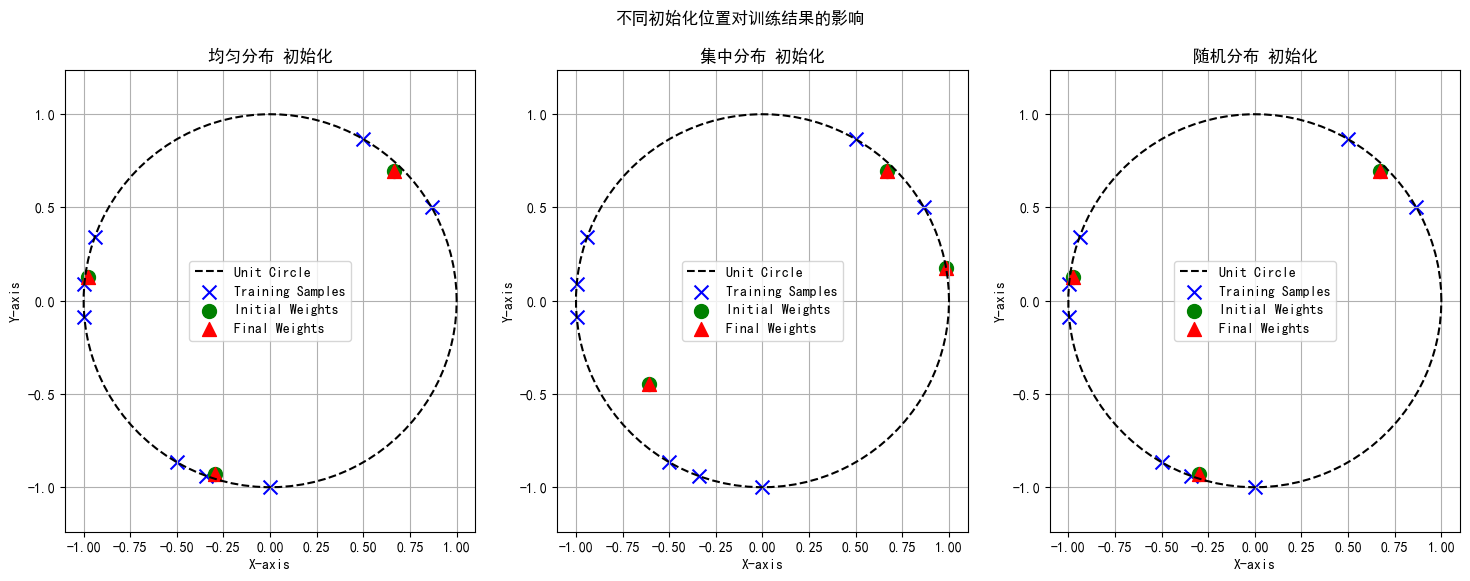

In [4]:
import numpy as np
import matplotlib.pyplot as plt
# 设置字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题

# 三种不同的初始化位置
initializations = {
    "均匀分布": [0, 120, 240],
    "集中分布": [10, 20, 30],
    "随机分布": [np.random.randint(0, 360) for _ in range(3)]
}

# 绘图设置
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 迭代每种初始化位置，进行训练并绘制结果
for idx, (init_name, angles_w) in enumerate(initializations.items()):
    # 将初始角度转换为笛卡尔坐标
    weights = [polar_to_cartesian(1, angle) for angle in angles_w]

    # 学习率策略：使用等比例下降
    eta_proportional = [initial_eta * (0.75 ** i) for i in range(total_iterations)]
    final_weights = wta_training(weights, samples, eta_proportional)

    # 绘制单位圆
    theta = np.linspace(0, 2 * np.pi, 100)
    x_circle = np.cos(theta)
    y_circle = np.sin(theta)
    axes[idx].plot(x_circle, y_circle, 'k--', label='Unit Circle')

    # 绘制训练样本
    sample_x = [s[0] for s in samples]
    sample_y = [s[1] for s in samples]
    axes[idx].scatter(sample_x, sample_y, color='blue', label='Training Samples', s=100, marker='x')

    # 绘制初始权向量
    initial_x = [w[0] for w in weights]
    initial_y = [w[1] for w in weights]
    axes[idx].scatter(initial_x, initial_y, color='green', label='Initial Weights', s=100, marker='o')

    # 绘制训练后的权向量
    final_x = [w[0] for w in final_weights]
    final_y = [w[1] for w in final_weights]
    axes[idx].scatter(final_x, final_y, color='red', label='Final Weights', s=100, marker='^')

    # 设置图例和标题
    axes[idx].legend()
    axes[idx].set_title(f"{init_name} 初始化")
    axes[idx].set_xlabel("X-axis")
    axes[idx].set_ylabel("Y-axis")
    axes[idx].grid(True)
    axes[idx].axis('equal')

plt.suptitle("不同初始化位置对训练结果的影响")
plt.show()


* 均匀分布：初始权向量均匀分布有助于权向量均衡地覆盖样本空间。通常情况下，这种初始化能够使每个权向量获得独立的职责区域。

* 集中分布：初始权向量集中分布在小范围内可能导致部分权向量在训练过程中始终在同一职责区域竞争，导致权向量不能有效覆盖整个样本空间。

* 随机分布：随机分布可能导致训练结果的不确定性，权向量最终的位置可能受到初始位置的较大影响，难以确保覆盖样本空间。

## 字母CHL竞争算法识别

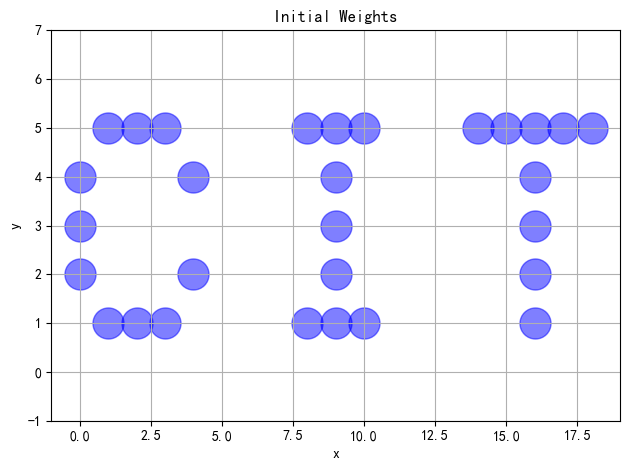

In [5]:
c_data = [0,1,1,1,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1,1,1,0]
i_data = [0,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,1,0]
t_data = [1,1,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0]
x_data = np.array([c_data, i_data, t_data]).astype(np.float32)
DOT_SIZE            = 1
CHAR_DIST           = 7

def plotw(w, title):
    plt.clf()

    for id,ww in enumerate(w):
        x = id * CHAR_DIST * DOT_SIZE
        for hid,v in enumerate(ww):
            line = hid // 5
            col  = hid % 5
            yy = (5-line) * DOT_SIZE
            xx = x + col * DOT_SIZE

            area = v * 500
            plt.scatter(xx, yy, s=area, c='b', alpha=0.5)

    plt.xlabel("x")
    plt.ylabel("y")
    plt.axis([-1.0, 19, -1, 7])
    plt.grid(True)
    plt.title(title)
    plt.tight_layout()
    plt.draw()
    plt.pause(0.002)


plotw(x_data, "Initial Weights")

神经元 1 的权向量：[5.37827752e-01 9.99883274e-01 9.99365267e-01 9.99049481e-01
 5.37310216e-01 3.69450173e-04 1.37562528e-04 9.99683058e-01
 1.42365286e-03 1.67696619e-03 4.87513597e-05 2.29708942e-03
 9.99603165e-01 5.02894082e-04 4.30625803e-04 4.34366718e-04
 7.20553190e-04 9.98874455e-01 1.02299851e-03 6.89733562e-04
 1.44908396e-03 4.61021308e-01 9.98323548e-01 4.61558612e-01
 1.08013496e-03]
神经元 2 的权向量：[0.78517596 0.19967378 0.51423444 0.59241457 0.04645041 0.60754485
 0.17052412 0.06505159 0.94888554 0.96563203 0.80839735 0.30461377
 0.09767211 0.68423303 0.44015249 0.12203823 0.49517691 0.03438852
 0.9093204  0.25877998 0.66252228 0.31171108 0.52006802 0.54671028
 0.18485446]
神经元 3 的权向量：[5.74116690e-02 1.00000000e+00 9.29695487e-01 8.78537468e-01
 6.26265744e-02 1.00000000e+00 8.75948804e-23 1.21938455e-01
 5.93889234e-02 1.00000000e+00 1.00000000e+00 2.68596609e-22
 8.20331229e-22 3.53134608e-22 2.78084857e-22 1.00000000e+00
 1.39494763e-22 6.88952795e-02 7.17733319e-02 1.00000000e+0

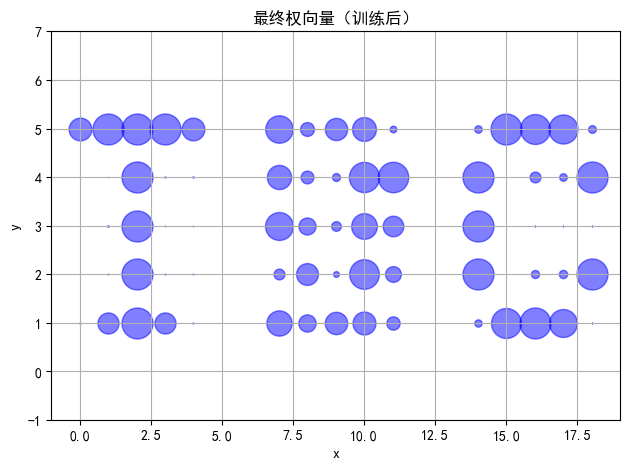

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import random

# 设置随机种子
np.random.seed(42)
random.seed(42)

# 数据源
c_data = [0,1,1,1,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1,1,1,0]
i_data = [0,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,1,0]
t_data = [1,1,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0]
x_data = np.array([c_data, i_data, t_data]).astype(np.float32)

# 生成海明距离为 1 的噪声样本
def generate_noisy_samples(data, num_samples=25):
    noisy_samples = []
    for sample in data:
        for _ in range(num_samples):
            noisy_sample = sample.copy()
            idx = random.randint(0, len(sample) - 1)
            noisy_sample[idx] = 1 - noisy_sample[idx]  # 翻转该位
            noisy_samples.append(noisy_sample)
    return np.array(noisy_samples)

# 生成带噪声的样本
noisy_samples_h1 = generate_noisy_samples(x_data, num_samples=25) # 25*3

# 初始化权向量为 0 到 1 的随机小数
weights = np.random.rand(3, 25)

# 胜者为王 (WTA) 算法训练
def wta_training(weights, samples, eta_strategy):
    trained_weights = weights.copy()
    for eta in eta_strategy:
        for sample in samples:
            distances = [np.linalg.norm(sample - w) for w in trained_weights]
            winner_idx = np.argmin(distances)
            trained_weights[winner_idx] += eta * (sample - trained_weights[winner_idx])
    return trained_weights

# 设置学习率策略
initial_eta = 0.6
total_iterations = 100
eta_strategy = [initial_eta * (0.75 ** i) for i in range(total_iterations)]

# 选择训练样本（每个字母1个正确样本和5个带噪声样本）
train_samples = np.concatenate([x_data, noisy_samples_h1[:15]])

# 训练竞争网络
final_weights = wta_training(weights, train_samples, eta_strategy)

for i, w in enumerate(final_weights, 1):
    print(f"神经元 {i} 的权向量：{w}")
# 可视化最终的权向量
plotw(final_weights, "最终权向量（训练后）")


In [7]:
noisy_samples_test_h1 = noisy_samples_h1[15:]  # 剩余20*3个样本
correct_count = 0
for sample in noisy_samples_test_h1:
    distances = [np.linalg.norm(sample - w) for w in final_weights]
    if np.argmin(distances) == np.argmax([np.dot(sample, w) for w in final_weights]):
        correct_count += 1

print(f"在 60 个噪声样本的测试中，正确识别了 {correct_count} 个样本，识别率为 {correct_count / 60:.2%}")

在 60 个噪声样本的测试中，正确识别了 60 个样本，识别率为 100.00%


In [9]:
def generate_noisy_samples_h2(data, num_samples=25):
    noisy_samples = []
    for sample in data:
        for _ in range(num_samples):
            noisy_sample = sample.copy()
            idx1, idx2 = random.sample(range(len(sample)), 2)
            noisy_sample[idx1] = 1 - noisy_sample[idx1]  # 翻转第一个位置
            noisy_sample[idx2] = 1 - noisy_sample[idx2]  # 翻转第二个位置
            noisy_samples.append(noisy_sample)
    return np.array(noisy_samples)

noisy_samples_h2 = generate_noisy_samples_h2(x_data, num_samples=25)
correct_count_h2 = 0
for sample in noisy_samples_h2:
    distances = [np.linalg.norm(sample - w) for w in final_weights]
    if np.argmin(distances) == np.argmax([np.dot(sample, w) for w in final_weights]):
        correct_count_h2 += 1

print(f"在海明距离为 2 的 75 个噪声样本测试中，正确识别了 {correct_count_h2} 个样本，识别率为 {correct_count_h2 / 75:.2%}")

在海明距离为 2 的 75 个噪声样本测试中，正确识别了 75 个样本，识别率为 100.00%
